In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

sns.set_style("darkgrid")
import os
from pca import PCA

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), "Data")
returns = pd.read_excel(os.path.join(path, "Data.xlsx"), sheet_name="RETURNS").rename(
    columns={"Unnamed: 0": "Date"}
)
returns = returns.set_index("Date")
returns.head()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.032523,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.022783,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,0.021922,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,-0.001103,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.042522,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [3]:
stocks = returns.columns.tolist()
model = PCA(returns, stocks)
my_data = model.returns
cov = model.cov_matrix
eigen_values = model.eigenvalues
eigen_vectors = model.eigenvectors

my_data.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,0.110458,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,0.027679,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,0.008198,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,0.027944,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,-0.076527,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [4]:
# Bai-Ng criterion
bic_values = model.full_model.ic
bic_values

,IC_p1,IC_p2,IC_p3
ncomp,,,
0,9.225426,9.225426,9.225426
1,8.749818,8.754918,8.737094
2,8.734623,8.744823,8.709174
3,8.735020,8.750321,8.696847
4,8.753773,8.774174,8.702875
5,8.780304,8.805805,8.716681
6,8.810342,8.840944,8.733995
7,8.840241,8.875943,8.751170
8,8.872158,8.912961,8.770363


In [5]:
# Kaiser criterion
eigen_values = model.eigenvalues
variance_explained = model.variance_explained

<Axes: >

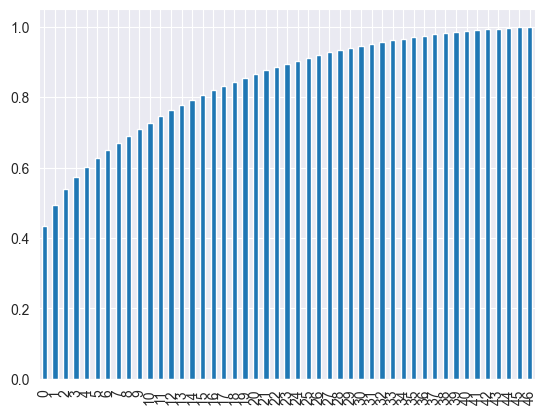

In [6]:
variance_explained.plot.bar()

In [11]:
pc_scores = model.pc_scores
pc_scores["PC1"].describe()

count    2.160000e+02
mean    -1.541976e-18
std      6.819943e-02
min     -2.892814e-01
25%     -4.426678e-02
50%     -4.041725e-03
75%      3.961758e-02
max      2.586101e-01
Name: PC1, dtype: float64

In [13]:
loadings = model.pc_loadings
loadings 

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_37,comp_38,comp_39,comp_40,comp_41,comp_42,comp_43,comp_44,comp_45,comp_46
ANHEUSER-BUSCH INBEV SA/NV,-0.119566,-0.114169,0.125386,-0.249523,0.161238,-0.406193,0.031992,-0.003787,0.162948,-0.066799,...,-0.118332,0.145098,0.088107,-0.015817,-0.003876,-0.011504,-0.012095,-0.017767,0.106864,-0.024264
KONINKLIJKE AHOLD DELHAIZE N,-0.077389,-0.052554,0.246749,-0.076291,0.273032,0.181774,0.037121,0.413819,0.077321,-0.250060,...,-0.079592,0.024683,-0.114188,-0.080492,0.034976,-0.065096,0.002907,-0.003035,-0.000807,-0.011370
ADIDAS AG,-0.122744,-0.221190,-0.035921,0.063310,0.083296,-0.104857,-0.141510,-0.007670,0.026357,-0.076485,...,-0.038842,-0.065988,0.067441,0.023619,-0.021357,-0.049895,0.051503,-0.055233,0.073890,0.015539
AIR LIQUIDE SA,-0.148624,-0.127850,0.151813,0.037441,-0.151969,0.144714,-0.049832,-0.058019,-0.139131,-0.155335,...,-0.033192,-0.075941,0.178323,-0.050866,-0.010937,-0.165048,0.130938,-0.042013,0.105010,0.042315
AIRBUS SE,-0.144585,0.017968,-0.025215,-0.295253,0.168011,0.022662,0.056990,-0.031003,-0.001407,0.352383,...,0.071557,-0.133613,0.101065,-0.218286,-0.047716,-0.044204,0.016296,-0.194746,-0.025165,0.062451
ALLIANZ SE-REG,-0.184044,0.056810,-0.083157,0.089287,-0.066590,0.036129,-0.179842,0.030794,0.017980,-0.030031,...,0.225174,-0.056933,-0.095879,-0.241469,0.341229,-0.123747,-0.159194,0.021788,-0.315840,-0.355399
ASML HOLDING NV,-0.127349,-0.161842,-0.024870,0.040327,0.263917,0.170390,0.340090,-0.079204,-0.018449,-0.048283,...,-0.079157,-0.097185,0.054274,-0.016194,0.020659,-0.026208,-0.054942,-0.040381,0.063489,0.010764
BASF SE,-0.178054,-0.082133,-0.107434,-0.081861,-0.234437,0.072450,0.077131,0.063960,-0.041829,-0.126371,...,0.058479,0.210539,-0.297600,-0.290162,-0.315426,0.134069,0.088462,-0.177131,0.015976,0.061791
BAYER AG-REG,-0.137602,-0.071161,0.066343,-0.165936,-0.274932,0.058970,0.015086,-0.079935,0.074448,-0.231866,...,-0.098891,-0.087239,0.156796,0.067336,0.020526,-0.097543,-0.009167,0.047911,0.052014,0.028049
BANCO BILBAO VIZCAYA ARGENTA,-0.172912,0.226098,-0.126883,-0.024572,0.065594,-0.083254,-0.071284,-0.012641,-0.067739,0.029063,...,0.097501,-0.169159,-0.130749,0.065903,0.064645,-0.141909,0.046838,-0.053617,0.547961,-0.391694


In [8]:
for i in stocks:
    print(returns[i].head())


print(returns.columns.tolist())

Date
2006-01-31    0.548973
2006-02-28    0.356658
2006-03-31    0.339669
2006-04-28   -0.114943
2006-05-31   -0.932751
Name: EUROSTOXX50, dtype: float64
Date
2006-01-31    0.587450
2006-02-28   -0.113101
2006-03-31   -0.150425
2006-04-28    0.472788
2006-05-31   -0.920792
Name: ANHEUSER-BUSCH INBEV SA/NV, dtype: float64
Date
2006-01-31   -0.111836
2006-02-28    1.206704
2006-03-31   -1.079948
2006-04-28   -0.003508
2006-05-31   -0.630504
Name: KONINKLIJKE AHOLD DELHAIZE N, dtype: float64
Date
2006-01-31    0.791435
2006-02-28   -0.720566
2006-03-31   -0.203849
2006-04-28    0.172837
2006-05-31   -0.978275
Name: ADIDAS AG, dtype: float64
Date
2006-01-31    0.644653
2006-02-28   -0.656768
2006-03-31    0.565685
2006-04-28   -0.250144
2006-05-31   -0.884207
Name: AIR LIQUIDE SA, dtype: float64
Date
2006-01-31   -0.018728
2006-02-28   -0.607933
2006-03-31    1.211619
2006-04-28   -1.166146
2006-05-31   -1.089186
Name: AIRBUS SE, dtype: float64
Date
2006-01-31    0.360331
2006-02-28    0.1

In [9]:
scores = model.reduced_pc_scores  # PC1
scores

AttributeError: 'PCA' object has no attribute 'reduced_pc_scores'

In [ ]:
returns = model.returns
returns

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.548973,0.587450,-0.111836,0.791435,0.644653,-0.018728,0.360331,0.893937,-0.080220,-0.407811,...,0.726423,0.250474,0.609178,1.353787,0.607245,1.863681,-0.199258,1.027593,-0.547727,0.692194
2006-02-28,0.356658,-0.113101,1.206704,-0.720566,-0.656768,-0.607933,0.147177,-0.996802,-0.431292,-0.288642,...,-0.379906,-1.068131,0.405336,0.082305,0.214294,-0.220279,0.415890,-1.268902,-0.332444,1.860823
2006-03-31,0.339669,-0.150425,-1.079948,-0.203849,0.565685,1.211619,0.105345,-0.648694,0.185272,-0.350194,...,-0.416729,1.687347,-0.223524,0.551600,-0.126023,0.386145,-0.015415,0.397898,1.775963,0.294621
2006-04-28,-0.114943,0.472788,-0.003508,0.172837,-0.250144,-1.166146,-0.616400,-0.301681,0.544118,1.326093,...,-0.495210,-0.961823,0.162330,-0.629100,-0.488848,-0.072889,-0.308970,-0.004235,0.234408,-0.396745
2006-05-31,-0.932751,-0.920792,-0.630504,-0.978275,-0.884207,-1.089186,-1.071373,-0.980918,-0.609978,-0.298167,...,-1.799564,-0.391060,-0.823193,-0.831097,-1.544507,-1.271754,0.350956,-0.899731,-0.078787,-0.881183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.850411,-0.007731,-0.582097,-0.113297,0.232279,-0.024117,0.296129,-1.048756,-0.638118,-0.705103,...,-0.381578,0.185143,-0.285229,0.387304,-1.528709,-0.486761,-0.226615,0.706741,0.472803,-0.705337
2023-09-29,-0.644429,-0.117661,-1.145421,-1.332046,-1.089742,-0.771209,-0.047903,-1.220477,-1.176828,-1.377835,...,-0.146493,0.415980,-0.000962,-0.840257,-0.444540,-0.324036,0.141630,1.271389,-0.345110,-0.467604
2023-10-31,-0.616192,0.157363,-0.493027,-0.098533,0.025865,-0.188607,-0.409549,-0.134629,0.066380,-1.438721,...,-0.302225,-2.900505,-0.260144,0.333266,-1.192680,-1.282652,-0.865967,0.115331,0.202966,-0.898901


In [ ]:
pca_models = model.pca_model()
first_stock = list(pca_models.keys())[0]
result_1 = pca_models[first_stock]["model_result"]
alpha_1 = pca_models[first_stock]["alpha"]
beta_1 = pca_models[first_stock]["beta"]
residuals_1 = pca_models[first_stock]["residuals"]
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2084.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          5.43e-157
Time:                        10:44:40   Log-Likelihood:                 62.598
No. Observations:                 216   AIC:                            -117.2
Df Residuals:                     212   BIC:                            -103.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-18      0.012   1.39e-16      1.0